<a href="https://colab.research.google.com/github/asimthaha/Pytorch_fundamentals/blob/main/01_Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

In [1]:
import torch
from torch import nn # nn contains all of pytorches building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

## 1. Data Preparing and Loading

excel
images
videos
audios
DNA data
text

ML is a game of two parts:
1. data to numerical representation
2. build a modle to learn patterns in that numerical representation


In [2]:
# create known parameters
weight = 0.7
bias = 0.3

start = 0
end=1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10], len(X), len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### splitting the data into train and test set

In [3]:
train_split = int(0.8 * len(X))
train_split

40

In [4]:
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test  = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

### Visualizing data

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data= X_test,
                     test_labels=Y_test,
                     predictions = None):
  """
  plots training data, test data and compare predictions.
  """
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # are there predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # show the legends
  plt.legend(prop={"size":14});

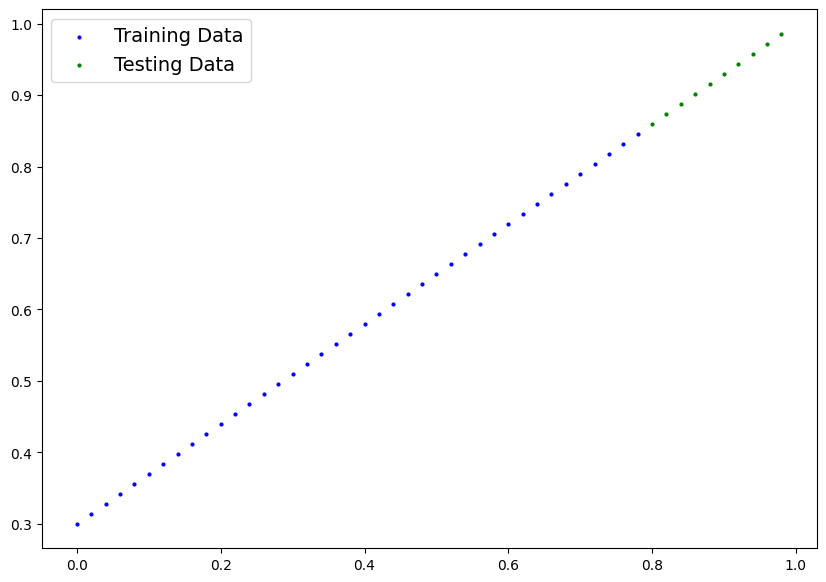

In [6]:
plot_predictions();

## 2. Building a model

What our model does:
* Start with random values (weight, bias)
* Look at training data and adjust hte random values to better represent(or get closer to) the ideal values(the weight & bias values we used to create the data)

How Does it do so:
* Through two main Algo:
* Gradient Descent
* Back Propagation



In [7]:
# create a linear regression model class
from torch import nn #(nn = neural networks)

class LinearRegressionModel(nn.Module):
  # pytorch inherits from nn.Module
  # Base class for all neural network modules
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # we start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # this parameter can be updated via gradient descent
                                            dtype = torch.float))
    self.bias= nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=float))

    # forward method to define computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # linear regression formula


* inherit the nn.Module class
* override the forward method

### pytorch model building essentials

* torch.nn - contains all of the buildings for computational graphs(neural network)
* torch..nn.Parameter - what parameter should our model try and learn
* torch.nn.Module - base class for all neural network modules(if we use it, override the forward() method)
* torch.optim - this is where the optimizer , helps in gradient descent
* def forward() - override this method

### checking the contents of our pytorch model

using .parameters()

In [15]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [17]:
torch.manual_seed(42)

model0 = LinearRegressionModel()

# checking the parameters
list(model0.parameters())

[Parameter containing:
 tensor([0.2303], requires_grad=True),
 Parameter containing:
 tensor([-1.1229], dtype=torch.float64, requires_grad=True)]

In [18]:
model0.state_dict()

OrderedDict([('weights', tensor([0.2303])),
             ('bias', tensor([-1.1229], dtype=torch.float64))])

### Making predictions through torch.inference_mode()

In [20]:
with torch.inference_mode(): #turns off inference mode for gradient descent
  Y_pred = model0(X_test)

Y_pred

tensor([[-0.9386],
        [-0.9340],
        [-0.9294],
        [-0.9248],
        [-0.9202],
        [-0.9156],
        [-0.9109],
        [-0.9063],
        [-0.9017],
        [-0.8971]], dtype=torch.float64)

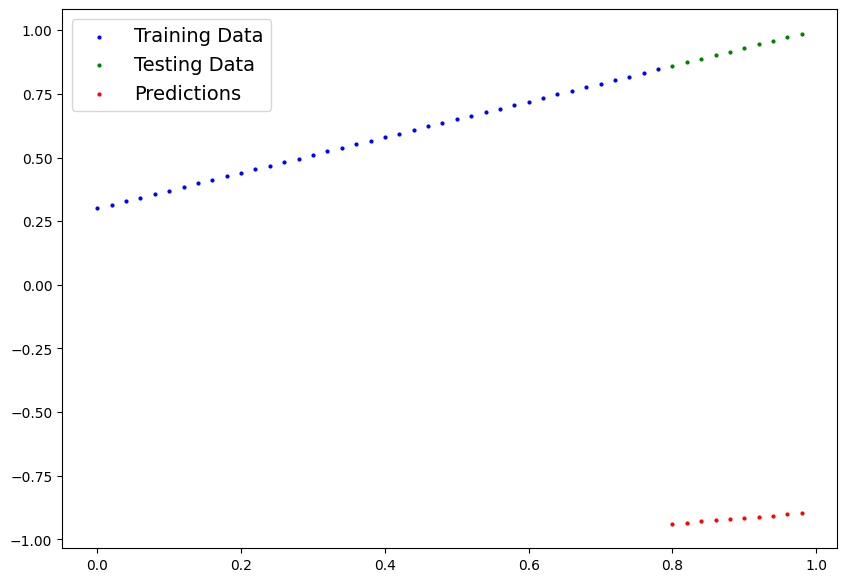

In [21]:
plot_predictions(predictions=Y_pred)

## Train the model

Loss Function

Optimizer


